In [5]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing

# Pontos importantes sobre visualização de dados

* Visualizações devem simplificar informações complexas
* Visualizações devem ajudar a identificar areas que merecem atenção nos seus dados
* Fazer gráficos deve ser fácil

* **Visualizações é uma ferramenta PODEROSA** 
    - **Devem ser bem feita e com cuidado. Seja para um artigo científico, seja para vender sua idéia em um slide**




# Prática: Introdução a Matplotlib

* Matplotlib é a biblioteca de visualização de dados mais utilizada no Python
* Pandas utiliza matplotlib em seu módulo de visualização (ao utilizar funções como .plot .hist)
* Seaborn (https://seaborn.pydata.org/) usa matplotib como base
* Matplotlib é extremamente flexível e customizavel.

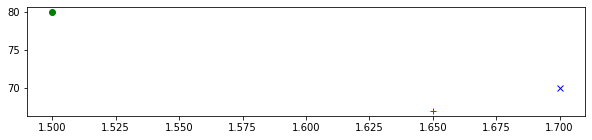

In [6]:
#Altura e Peso de Maria, Joao e Jose
altura_joao = 1.7
peso_joao = 70

altura_jose = 1.5
peso_jose = 80

altura_maria = 1.65
peso_maria = 67

# Hello World: Plotar pontos
plt.plot( altura_joao,peso_joao, "bx")
plt.plot( altura_maria,peso_maria, "r+")
plt.plot( altura_jose,peso_jose, "go")

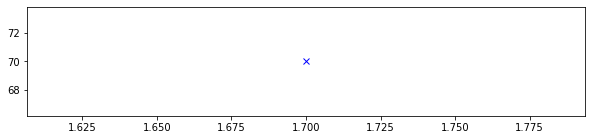

In [7]:
# Obs1: Toda vez que a imagem for desenhada (plt.show() usando o terminal), o objeto plt é limpo.
# Exemplo: utilizanto plt.plot novamente fora da mesma celula do notebook, cria-se uma nova imagem
plt.plot( altura_joao,peso_joao, "bx")

Text(0.5, 1.0, 'Altura de Joao, Maria e Jose')

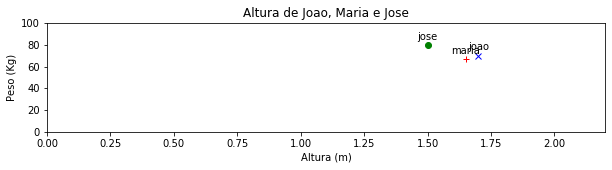

In [9]:
# Sempre coloque nomes nos eixos, sempre. Se possível coloque titulos
plt.rcParams['figure.figsize'] = [10, 2]
peso_offset = 5

plt.plot( altura_joao,peso_joao, "bx")
plt.text( altura_joao, peso_joao + peso_offset, "joao",  horizontalalignment="center")

plt.plot( altura_maria,peso_maria, "r+")
plt.text(altura_maria,peso_maria + peso_offset, "maria", horizontalalignment="center")

plt.plot( altura_jose,peso_jose, "go")
plt.text(altura_jose,peso_jose + peso_offset, "jose", horizontalalignment="center")

# Limitando o alcance dos eixos
plt.ylim(0,100)
plt.xlim(0,2.2)

# Nomeando Eixos
plt.ylabel("Peso (Kg)")
plt.xlabel("Altura (m)")
plt.title("Altura de Joao, Maria e Jose")

In [7]:
# Pratica 2: Visualizando uma turma inteira e destacando quem tem BMI

Text(0.5, 1.0, 'Gráfico de Dispersão da Altura e Peso da Turma (Tentativa 1)')

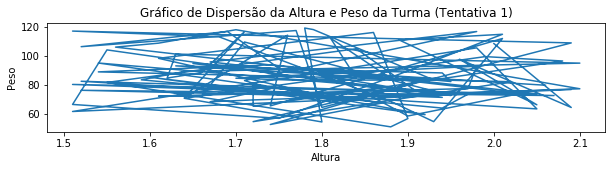

In [10]:
# Visualizando uma turma sintetica
# Dados da turma
altura_sala = [round(random.uniform(1.5,2.1),2) for i in range(100)]
peso_sala = [round(random.uniform(50,120),2) for i in range(100)]

#Aluno x, altura_sala[x], peso_sala[x]

# Plotando o gráfico (Tentativa 1)
plt.plot(altura_sala, peso_sala)
plt.ylabel("Peso")
plt.xlabel("Altura")
plt.title("Gráfico de Dispersão da Altura e Peso da Turma (Tentativa 1)")

Text(0.5, 1.0, 'Gráfico de Dispersão da Altura e Peso da Turma (Tentativa 2)')

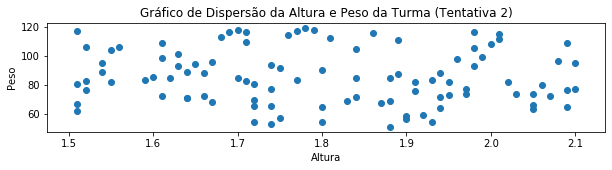

In [11]:
# Plotando o gráfico (Tentativa 2)
plt.scatter(altura_sala, peso_sala)
plt.ylabel("Peso")
plt.xlabel("Altura")
plt.title("Gráfico de Dispersão da Altura e Peso da Turma (Tentativa 2)")

# Objetivo: Destacar Indice de Massa Corporal muito altos ou muito baixos

In [12]:

# Convertendo 2 listas para um DataFrame
sala_dict = {
    "Peso" : peso_sala,
    "Altura" : altura_sala
}
sala_df = pd.DataFrame(sala_dict)
sala_df.head()

,Peso,Altura
0,79.63,2.06
1,94.70,1.65
2,72.50,1.95
3,109.59,1.71
4,71.97,1.66


In [13]:
# Computando IMC
# Forma 1
IMC = []
for index, valores in sala_df.iterrows():
    peso = valores["Peso"]
    altura = valores["Altura"]
    IMC.append(peso / altura **2)

sala_df["IMC"] = IMC

# Forma 2: Recomendado.
sala_df["IMC_2"] = sala_df.apply(lambda row: row["Peso"]/row["Altura"]**2, axis=1)
sala_df.head()

,Peso,Altura,IMC,IMC_2
0,79.63,2.06,18.764728,18.764728
1,94.70,1.65,34.784206,34.784206
2,72.50,1.95,19.066404,19.066404
3,109.59,1.71,37.478198,37.478198
4,71.97,1.66,26.117724,26.117724


In [15]:
#Filtrar os dados de acordo com as faixas de peso
estudantes_magros = sala_df[sala_df["IMC"] < 18.5]
estudantes_normal = sala_df[(sala_df["IMC"] > 18.5) & (sala_df["IMC"] < 25)]
estudantes_sobrepeso = sala_df[sala_df["IMC"] > 25]

print(estudantes_magros.head())
print(estudantes_normal.head())
print(estudantes_sobrepeso.head())

     Peso  Altura        IMC      IMC_2
13  54.17    1.80  16.719136  16.719136
19  59.23    1.92  16.067166  16.067166
24  56.52    1.90  15.656510  15.656510
25  50.77    1.88  14.364531  14.364531
38  54.39    1.93  14.601734  14.601734
     Peso  Altura        IMC      IMC_2
0   79.63    2.06  18.764728  18.764728
2   72.50    1.95  19.066404  19.066404
6   77.30    1.97  19.918060  19.918060
7   92.82    1.98  23.676155  23.676155
10  83.31    1.93  22.365701  22.365701
     Peso  Altura        IMC      IMC_2
1   94.70    1.65  34.784206  34.784206
3  109.59    1.71  37.478198  37.478198
4   71.97    1.66  26.117724  26.117724
5   72.07    1.61  27.803711  27.803711
8   84.49    1.70  29.235294  29.235294


Text(0, 0.5, 'Peso')

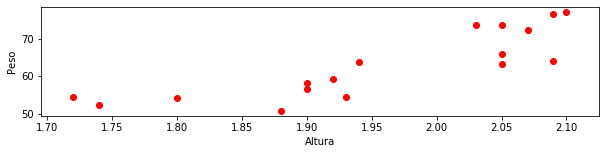

In [16]:
#Plot Estudantes Magros Utilizando matplotlib
plt.scatter(estudantes_magros["Altura"], estudantes_magros["Peso"], c="r", marker="o")
plt.xlabel("Altura")
plt.ylabel("Peso")

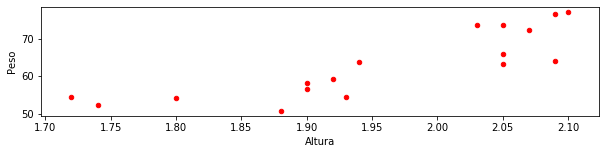

In [17]:
#Plot Estudantes Magros Utilizando pandas
estudantes_magros.plot.scatter(x="Altura", y="Peso", c="r", marker="o")

# Plotando todos os estudantes
## Cuidado!

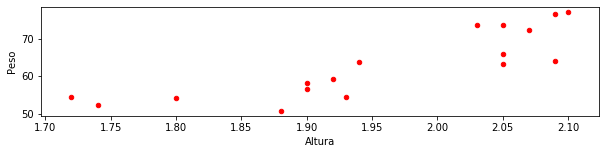

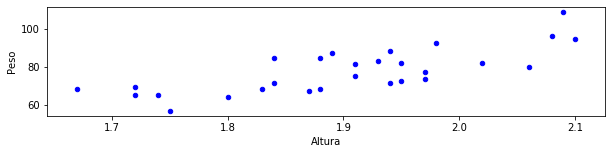

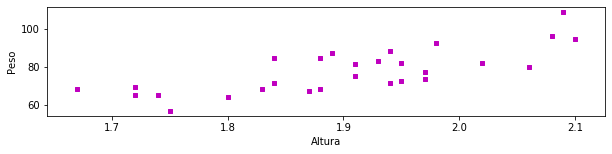

In [18]:
#Plot Todas as faixas de peso Utilizando pandas (Tentativa 1)
ax = estudantes_magros.plot.scatter(x="Altura", y="Peso", c="r", marker="o")
ax = estudantes_normal.plot.scatter(x="Altura", y="Peso", c="b", marker="o")
ax = estudantes_normal.plot.scatter(x="Altura", y="Peso", c="m", marker="s")



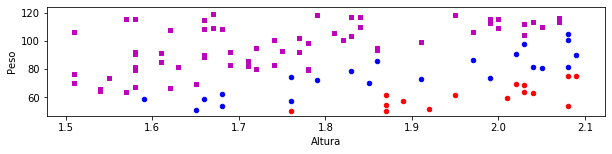

In [17]:
#Plot Estudantes Magros Utilizando pandas (Tentativa 2)
# Obs: Utilizando mesmo eixo

ax = estudantes_magros.plot.scatter(x="Altura", y="Peso", c="r", marker="o")
ax = estudantes_normal.plot.scatter(ax=ax, x="Altura", y="Peso", c="b", marker="o")
ax = estudantes_sobrepeso.plot.scatter(ax=ax, x="Altura", y="Peso", c="m", marker="s")


In [18]:
#Clear Figure
plt.close()

# Exercicio: Utilizando Titanic Dataset


In [19]:
# Lendo conjunto de dados do titanic da aula passada
df_titanic_all = pd.read_csv("../aula_04/titanic_data.csv")
df_titanic_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# Selecionando variaveis: Sexo, Idade, Classe, Sobreviveu e Tarifa
df_titanic = df_titanic_all[["Sex", "Age","Pclass","Survived", "Fare"]]
# Removendo Valores Nulos
df_titanic = df_titanic.dropna().reset_index(drop=True)
df_titanic.head()

,Sex,Age,Pclass,Survived,Fare
0,male,22.0,3,0,7.2500
1,female,38.0,1,1,71.2833
2,female,26.0,3,1,7.9250
3,female,35.0,1,1,53.1000
4,male,35.0,3,0,8.0500


In [24]:
# Discretizando valores para Sexo
df_titanic["Sex"] = df_titanic["Sex"] == "female"
df_titanic.head()

,Sex,Age,Pclass,Survived,Fare
0,False,22.0,3,0,7.2500
1,True,38.0,1,1,71.2833
2,True,26.0,3,1,7.9250
3,True,35.0,1,1,53.1000
4,False,35.0,3,0,8.0500


In [25]:
# Discretizando valores para Sexo
df_titanic["Sex"] = df_titanic["Sex"].astype(int)
df_titanic.head()

,Sex,Age,Pclass,Survived,Fare
0,0,22.0,3,0,7.2500
1,1,38.0,1,1,71.2833
2,1,26.0,3,1,7.9250
3,1,35.0,1,1,53.1000
4,0,35.0,3,0,8.0500


In [26]:
# Criando Coluna Criança
df_titanic["Child"] = df_titanic["Age"].apply(lambda age: int(age < 15))
df_titanic.head()

,Sex,Age,Pclass,Survived,Fare,Child
0,0,22.0,3,0,7.2500,0
1,1,38.0,1,1,71.2833,0
2,1,26.0,3,1,7.9250,0
3,1,35.0,1,1,53.1000,0
4,0,35.0,3,0,8.0500,0


In [35]:
# Antes de realizar PCA, sempre precisamos normalizar os dados e remover a coluna alvo (Survived)
df_titanic_X = df_titanic[["Age", "Child", "Fare", "Sex","Pclass"]]
# Normalizando pelo Desvio Padrao
preprocessed_scaled = preprocessing.scale(df_titanic_X)
print("Check if STD = 1 std:", preprocessed_scaled.std())

Check if STD = 1 std: 0.9999999999999999


In [45]:
# Observação
# Normalizando L2, ou Normalização Euclideana
vetor = np.array([[3,2,6]])
norma2 = (3**2 + 2**2 + 6 ** 2) ** 0.5
vetor_l2 = vetor / norma2
print("L2 manual:",vetor_l2)
print("L2:",preprocessing.normalize(vetor.reshape(1,-1)))

#Aplicando normalize nos dados ja padronizados
preprocessed_normalize = preprocessing.normalize(preprocessed_scaled)

L2 manual: [[0.42857143 0.28571429 0.85714286]]
L2: [[0.42857143 0.28571429 0.85714286]]


In [46]:
# Resumo do conjunto de dados
pca = PCA(n_components=2)
pca.fit(preprocessed_normalize)
print("Titanic DataFrame:", df_titanic.shape)
titanic_transformed_axis = pca.transform(preprocessed_normalize)
print("Titanic PCA:", titanic_transformed_axis.shape)
titanic_transformed_axis

Titanic DataFrame: (714, 6)
Titanic PCA: (714, 2)


array([[-0.83506026,  0.16867706],
       [ 1.09549496, -0.09762374],
       [ 0.14859527,  0.8690751 ],
       ...,
       [ 0.87962258,  0.23626176],
       [ 0.32509492, -0.66018238],
       [-0.80048366, -0.07221285]])

Text(0.5, 1.0, 'Plot PCA Basico')

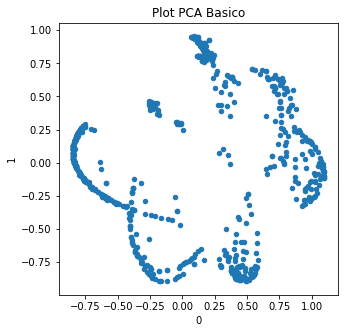

In [53]:
# Plot utilizando 2 componentes principais
transformed_df = pd.DataFrame(titanic_transformed_axis)
plt.rcParams['figure.figsize'] = [5, 5]
transformed_df.plot.scatter(x=0, y=1)
plt.title("Plot PCA Basico")

Child:  (78, 3)
Adult:  (636, 3)


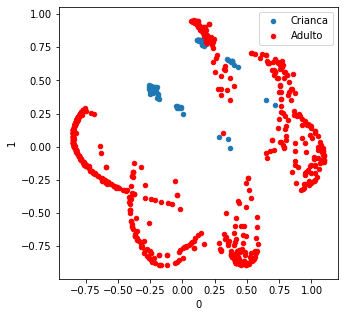

In [54]:
# Plot PCA Destacando Criancas
transformed_df["Child"] = df_titanic["Child"]
child_df = transformed_df[transformed_df["Child"] == 1]
adult_df = transformed_df[transformed_df["Child"] == 0]
ax = child_df.plot.scatter(x=0,y=1, label="Crianca")
ax = adult_df.plot.scatter(ax=ax,x=0,y=1,color="r", label="Adulto")
print("Child: ", child_df.shape)
print("Adult: ", adult_df.shape)

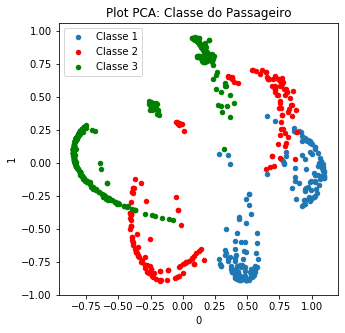

In [55]:
# Plot PCA Destacando Classes
transformed_df["Pclass"] = df_titanic["Pclass"]
class1_df = transformed_df[transformed_df["Pclass"] == 1]
class2_df = transformed_df[transformed_df["Pclass"] == 2]
class3_df = transformed_df[transformed_df["Pclass"] == 3]
ax = class1_df.plot.scatter(x=0,y=1, label="Classe 1")
ax = class2_df.plot.scatter(ax=ax,x=0,y=1,color="r", label="Classe 2")
ax = class3_df.plot.scatter(ax=ax,x=0,y=1,color="g", label="Classe 3")
plt.title("Plot PCA: Classe do Passageiro")
plt.legend()

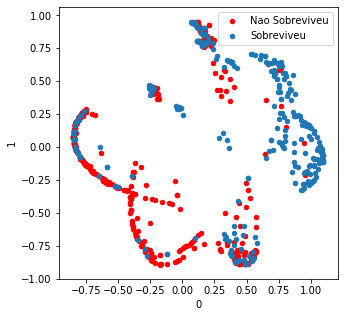

In [56]:
# Plot PCA Destacando Sobreviventes
transformed_df["Survived"] = df_titanic["Survived"]
not_survived_df = transformed_df[transformed_df["Survived"] == 0]
survived_df = transformed_df[transformed_df["Survived"] == 1]
ax = not_survived_df.plot.scatter(x=0,y=1, color="r", label="Nao Sobreviveu")
ax = survived_df.plot.scatter(ax=ax,x=0,y=1, label="Sobreviveu")